In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection


In [2]:
#Reading the dataset
df=pd.read_csv('C:\\Users\\user\\Desktop\\project new\\UK_National_Total_COVID_Dataset.csv')
df.head()

,date,areaName,newCasesByPublishDate,cumCasesByPublishDate,newAdmissions,cumAdmissions,hospitalCases,covidOccupiedMVBeds,newTestsByPublishDate,cumTestsByPublishDate,newDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDateRate,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDateRate,cumPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate
0,31-01-20,United Kingdom,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-02-20,United Kingdom,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02-02-20,United Kingdom,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03-02-20,United Kingdom,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,04-02-20,United Kingdom,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Shape of the dataset
df.shape

(682, 18)

In [4]:
#Some detailed info regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        682 non-null    object 
 1   areaName                                    682 non-null    object 
 2   newCasesByPublishDate                       682 non-null    int64  
 3   cumCasesByPublishDate                       682 non-null    int64  
 4   newAdmissions                               624 non-null    float64
 5   cumAdmissions                               624 non-null    float64
 6   hospitalCases                               623 non-null    float64
 7   covidOccupiedMVBeds                         617 non-null    float64
 8   newTestsByPublishDate                       619 non-null    float64
 9   cumTestsByPublishDate                       619 non-null    float64
 10  newDeaths28Day

In [5]:
df.columns

Index(['date', 'areaName', 'newCasesByPublishDate', 'cumCasesByPublishDate',
       'newAdmissions', 'cumAdmissions', 'hospitalCases',
       'covidOccupiedMVBeds', 'newTestsByPublishDate', 'cumTestsByPublishDate',
       'newDeaths28DaysByPublishDate', 'cumDeaths28DaysByPublishDate',
       'cumDeaths28DaysByPublishDateRate', 'newDeaths28DaysByDeathDate',
       'cumDeaths28DaysByDeathDate', 'cumDeaths28DaysByDeathDateRate',
       'cumPeopleVaccinatedFirstDoseByPublishDate',
       'cumPeopleVaccinatedSecondDoseByPublishDate'],
      dtype='object')

In [6]:
#Checking for null values
df.isnull().sum()


date                                            0
areaName                                        0
newCasesByPublishDate                           0
cumCasesByPublishDate                           0
newAdmissions                                  58
cumAdmissions                                  58
hospitalCases                                  59
covidOccupiedMVBeds                            65
newTestsByPublishDate                          63
cumTestsByPublishDate                          63
newDeaths28DaysByPublishDate                   35
cumDeaths28DaysByPublishDate                   35
cumDeaths28DaysByPublishDateRate               44
newDeaths28DaysByDeathDate                     34
cumDeaths28DaysByDeathDate                     34
cumDeaths28DaysByDeathDateRate                 44
cumPeopleVaccinatedFirstDoseByPublishDate     345
cumPeopleVaccinatedSecondDoseByPublishDate    345
dtype: int64

In [7]:
#Diplaying statistical values ofthe dataset
df.describe()

,newCasesByPublishDate,cumCasesByPublishDate,newAdmissions,cumAdmissions,hospitalCases,covidOccupiedMVBeds,newTestsByPublishDate,cumTestsByPublishDate,newDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDateRate,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDateRate,cumPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate
count,682.000000,6.820000e+02,624.000000,624.000000,623.00000,617.000000,6.190000e+02,6.190000e+02,647.000000,647.000000,638.000000,648.000000,648.000000,638.00000,3.370000e+02,3.370000e+02
mean,16069.334311,3.205650e+06,968.926282,328673.535256,9106.34992,1017.029173,5.710927e+05,1.228288e+08,226.069552,85625.656878,129.446552,225.896605,85742.668210,129.82163,3.783292e+07,2.657139e+07
std,16577.602725,3.079087e+06,918.608055,182807.725165,8786.56082,969.163642,3.976383e+05,1.175053e+08,318.230313,47116.615600,69.063491,293.848214,47193.905711,69.04287,1.378847e+07,1.802147e+07
min,0.000000,2.000000e+00,73.000000,4880.000000,770.00000,60.000000,1.189600e+04,1.551740e+05,0.000000,1.000000,0.100000,0.000000,1.000000,0.10000,2.286572e+06,3.913990e+05
25%,2071.750000,3.031278e+05,238.750000,135120.750000,2129.50000,262.000000,2.002160e+05,1.772162e+07,23.000000,41359.500000,61.725000,23.750000,41480.500000,61.90000,3.158162e+07,5.432126e+06
50%,6693.500000,2.805640e+06,772.500000,395400.500000,6937.00000,853.000000,5.271640e+05,7.561045e+07,97.000000,97329.000000,152.800000,110.000000,97368.000000,154.15000,4.445451e+07,3.258375e+07
75%,30109.000000,4.696044e+06,1274.000000,475616.750000,12707.00000,1272.000000,8.883285e+05,2.220107e+08,272.500000,128214.500000,191.200000,320.250000,128307.250000,191.37500,4.858461e+07,4.447077e+07
max,68053.000000,1.081952e+07,4582.000000,608216.000000,39254.00000,4077.000000,1.895354e+06,3.744689e+08,1820.000000,146439.000000,218.300000,1359.000000,146381.000000,218.20000,5.125451e+07,4.674207e+07


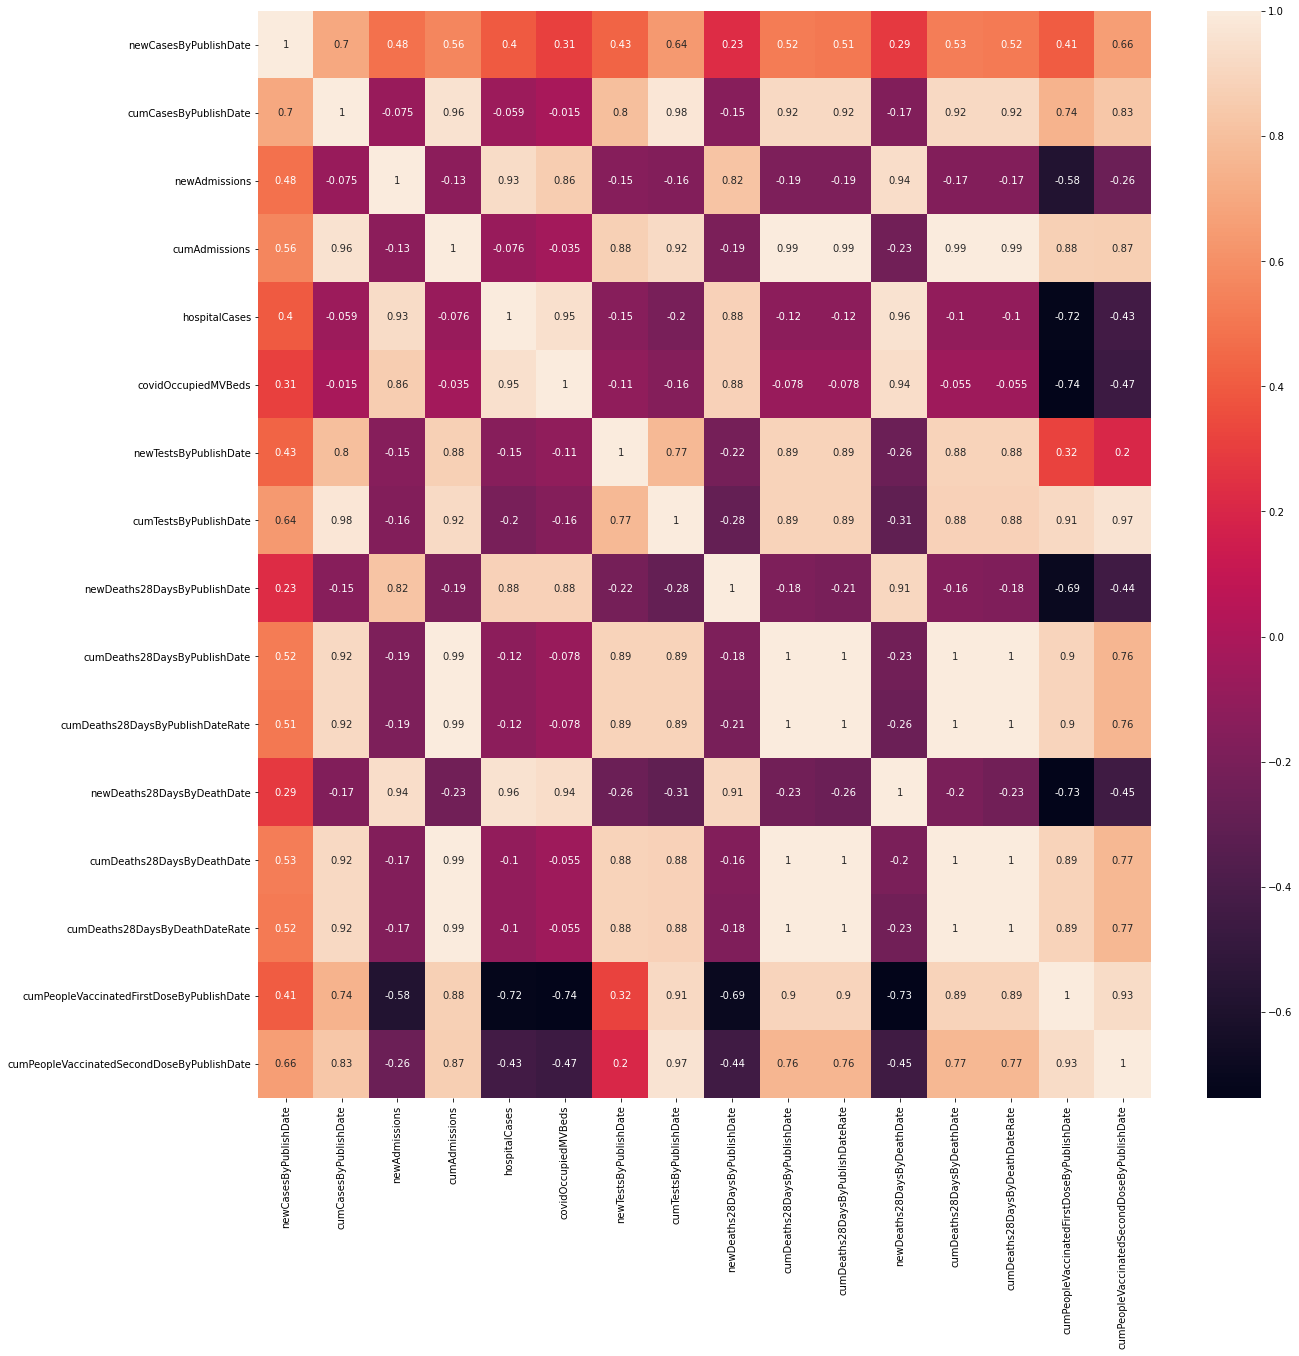

In [9]:
#Displaying the correlation between the attributes
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True)